### Calculate parquet layout

10 pack, 1.8 $m^2$ per pack, 4 piece per pack -> 40 piece

In [470]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8

In [471]:
# Input:
firstCut = 60 # cut from first piece
minWidth = 24 # minimum size of piece, if smaller, throw out

In [472]:
# Room dimensions
x = 389
y = 376
x1 =66
y1 = 168.5
y2 = 89.5
y3 = 118

In [473]:
# Parquet dimensions
pHeight = 24.5
pWidth = 184.5
tileArea = pHeight*pWidth
packArea = 1.8*10000
numInPack = 4
print(f'tileArea*numInPack={tileArea*numInPack}, packArea/tileArea={packArea/tileArea}')

tileArea*numInPack=18081.0, packArea/tileArea=3.982080637132902


In [474]:
print(f'roomArea={(x*y+x1*y2)/10000}')

roomArea=15.2171


In [475]:
from math import fabs

def createParquet(x0, y0, w=pWidth, full=True, invalid=False):
    
    kwargs = {}
    if full:
        kwargs['hatch'] = '/'
    if invalid:
        print(f'invalid parquet {x0}')
        kwargs['hatch'] = '|'
        kwargs['color'] = 'r'
    kwargs['fill'] = False
    return [[(x0, y0-pHeight), w, pHeight], kwargs]

In [476]:
def layoutParquets():
    global pWidth, pHeight, firstCut
    piecesUsed = 1
    parquets = []
    throwAway = []
    startLen = 0
    currY = y
    remain = pWidth - firstCut
    #parquets = [createParquet(0, y, pWidth), createParquet(pWidth, y)]
    while currY > 0:
        w = x
        if currY < y - y3:
            w = x+x1
        if currY < y - y3 - y2:
            w = x
        lastPiece = w

        xx = 0
        
        if remain < minWidth and remain > 0:
            throwAway.append(remain)
            remain = 0 # throw away remaining as too small
            parquets.append(createParquet(xx, currY, remain, True))
            piecesUsed += 1
        else:
            if remain > 0:
                parquets.append(createParquet(xx, currY, remain, False))
                xx += remain
                lastPiece -= remain
        
        while lastPiece > pWidth:
            parquets.append(createParquet(xx, currY, pWidth, True))
            piecesUsed += 1
            xx += pWidth
            lastPiece -= pWidth

        #print(f'curry {currY}, remain: {remain}, lastPiece {lastPiece}')
        if lastPiece < minWidth and lastPiece > 0:
            print(f'Warning! Cannot throw away the last piece ({lastPiece})')
            #throwAway.append(lastPiece)
            #remain = 0 # throw away
            parquets.append(createParquet(xx, currY, lastPiece, False, True))
            #parquets.append(createParquet(xx, currY, lastPiece, False))
        
        parquets.append(createParquet(xx, currY, lastPiece, False))
        piecesUsed += 1
        remain = pWidth - lastPiece
        
        currY -= pHeight
    print(f'pieces used: {piecesUsed}, packs used={piecesUsed/4.0}, throw away:{throwAway}')
    return parquets

In [477]:
#parquets = [createParquet(0, y), createParquet(pWidth, y)]
parquets = layoutParquets()
print(parquets[0])

Warning! Cannot throw away the last piece (20.0)
invalid parquet 369.0
pieces used: 37, packs used=9.25, throw away:[9.5]
[[(0, 351.5), 124.5, 24.5], {'fill': False}]


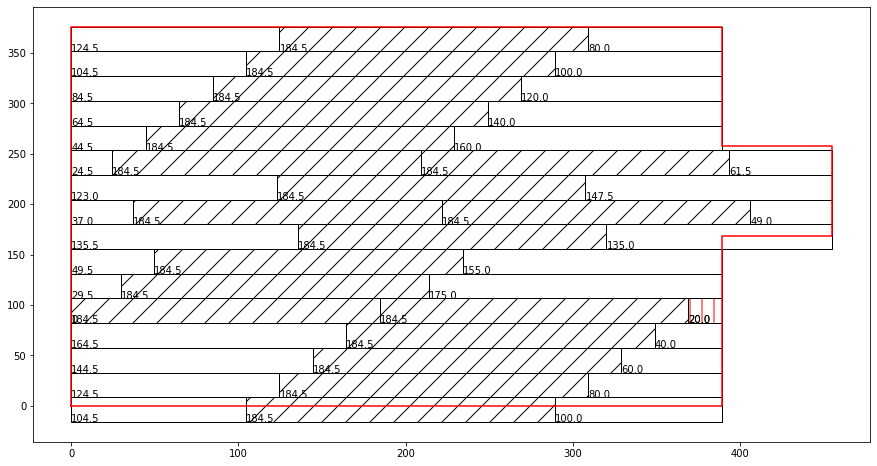

In [478]:

fig, ax = plt.subplots()
for p in parquets:
    ax.add_patch(patches.Rectangle(*p[0], **p[1]))
    if not p[1]['fill']:
        ax.text(p[0][0][0], p[0][0][1], str(p[0][1]))
plt.plot([0, x, x, x+x1, x+x1, x, x, 0, 0], [0, 0, y1, y1, y1+y2, y1+y2, y1+y2+y3,y1+y2+y3, 0], 'r')

plt.show()